# Imports and function definitions

In [35]:
# Used Python 3.7, beware

import pandas as pd
import numpy as np

data_case_storage="C://Users//Antoine//Documents//Ecole des Ponts//Cours 3A//Oliver Wymann//stored_data_case.h5"
parkmeter_coords_path = 'C://Users//Antoine//Documents//Ecole des Ponts//Cours 3A//Oliver Wymann//parkmeter_coords.h5'
new_data_path = 'C://Users//Antoine//Documents//Ecole des Ponts//Cours 3A//Oliver Wymann//clean_data.h5'

In [2]:
def list_HDF_file(file_name):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
        result = store.keys()   
    return result

def read_HDF_file(file_name, table):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
        return store[table]

# Data reading

In [3]:
# List of the data series in this dataframe
print(list_HDF_file(data_case_storage))

['/parking_counts', '/parkmeters_zones_12_12', '/transaction_and_locations']


In [36]:
# Reading the file
df=read_HDF_file(data_case_storage, "/transaction_and_locations")
df = df.drop(['parking_end', 'parkmeter_address', 'hourly_rate'], axis=1)
df['real_hourly_rate'] = df['amount'] / df['duration_hours']
df.to_hdf(new_data_path, key='transaction_and_locations')

In [34]:
print(df.keys())
print("Number of parkmeters : " + str(df["parkmeter_id"].drop_duplicates().count()))

Index(['parkmeter_id', 'user_type', 'payment_method', 'amount',
       'duration_hours', 'parking_start', 'arrondissement', 'system',
       'residential_area', 'parkmeter_coordinates', 'real_hourly_rate'],
      dtype='object')
Number of parkmeters : 7805


In [6]:
print("Revenus engendrés : ")
print(df["amount"].sum())

Revenus engendrés : 
61930408.510000125


In [19]:
print("Borne inf sur le nombre de paires heure de départ/arrivée erronés")
print(len(df[(df['parking_start'] > df['parking_end'])]))
print(len(df[((df['parking_end'] - df['parking_start']) / pd.Timedelta('1s')) > 3600 * df["duration_hours"]]))
print(len(df))

Borne inf sur le nombre de paires heure de départ/arrivée erronés
1035466
7245887
24251633


In [25]:
print(df[(((df['parking_end'] - df['parking_start']) / pd.Timedelta('1s')) < 10000 + 3600 * df["duration_hours"]) & 
             (((df['parking_end'] - df['parking_start']) / pd.Timedelta('1s')) > 8000 + 3600 * df["duration_hours"])].head(10))


          parkmeter_id user_type payment_method  amount  duration_hours  \
3002117       66391001   Rotatif    Paris Carte    2.40            2.00   
3396563       66391001   Rotatif    Paris Carte    2.40            2.00   
7922383       66391001  Résident             CB    0.65           10.00   
2466696       66391002   Rotatif    Paris Carte    0.30            0.25   
4356511       66391002   Rotatif    Paris Carte    0.30            0.25   
13465343      66391002   Rotatif    Paris Carte    0.30            0.25   
17828679      66391002  Résident    Paris Carte    0.55            8.46   
1219802       66391201   Rotatif    Paris Carte    0.30            0.25   
1358987       66391201  Résident             CB    0.65           10.00   
3425108       66391201   Rotatif    Paris Carte    0.60            0.50   

               parking_start         parking_end    parkmeter_address  \
3002117  2014-07-18 08:29:28 2014-07-18 13:00:00  121 BOULEVARD MURAT   
3396563  2014-08-07 08:20:19

In [ ]:
new_parkmeters = df[['parkmeter_id', 'user_type', 'parkmeter_coordinates', 'amount', '']]


In [7]:
rotatif_df = df[df['user_type'] == 'Résident']
np_values = np.unique((rotatif_df['amount'] / rotatif_df['duration_hours']).values)
print(np_values)

[1.08225108e-02 1.29870130e-02 1.30010834e-02 ... 1.62500000e+01
 2.16666667e+01 6.50000000e+01]


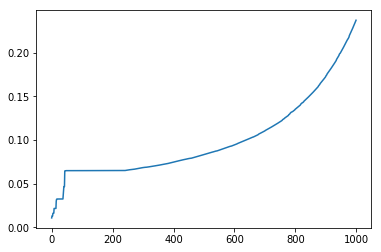

In [9]:
import matplotlib.pyplot as plt
plt.plot(np_values[:1000])
plt.show()

# Data extraction and saving

In [6]:
# Extracting the parkmeter coordinates
# The operation also retrieves the amount of money each parkmeter got
parkmeter_infos = df[['parkmeter_id', 'parkmeter_coordinates', 'amount']]
parkmeter_infos = parkmeter_infos.groupby(["parkmeter_id","parkmeter_coordinates"], as_index=False)["amount"].sum()
#print(parkmeter_infos)

In [7]:
print(parkmeter_infos)

      parkmeter_id         parkmeter_coordinates    amount
0            20301  48.8541990002, 2.33470999949  11135.68
1            40102      48.830383, 2.31482099952   5087.55
2            40202  48.8296970003, 2.31620000015   3663.65
3            40401       48.82884, 2.31826000035   6222.35
4            40405  48.8278949997, 2.32043099983  15185.06
5            60102  48.8433079999, 2.34211300028  12546.34
6            60202  48.8438679998, 2.33969899934   2135.62
7            80101  48.8570260003, 2.28092100068   6089.97
8           100402  48.8472750003, 2.32566599991  15695.36
9           120104  48.8426530004, 2.29379500058   2597.80
10          120201  48.8417590001, 2.29480300053   5786.91
11          120204  48.8413179998, 2.29495799938   6174.21
12          120302  48.8400059998, 2.29610099956   5478.91
13          120501  48.8392820001, 2.29717500047   3825.00
14          120601  48.8384990001, 2.29825900055   3047.65
15          120702  48.8381139997, 2.29867299968   3769.

In [ ]:
# Printing stuff
print(type(parkmeter_infos))
print("Shape of the dataframe : " + str(parkmeter_infos.shape) + "\n")

print("Ten first lines")
print(parkmeter_infos.head(10))
print("\nExample for one cell")
print(parkmeter_infos.iloc[0])

In [ ]:
# Storing the coordinates
parkmeter_infos.to_hdf(parkmeter_coords_path, key='parkmeter_coordinates')